In [2]:
import pandas as pd

In [4]:
import numpy as np
import matplotlib as plt

In [15]:
file_path = r'D:\Assignments\Assignment One\wind-speeds.csv'  


df = pd.read_csv(file_path, index_col=0, parse_dates=True)

In [18]:
df.head()

,north_sea_m_s,baltic_sea_m_s
time,,
2019-01-01 00:00:00,12.473,15.734
2019-01-01 01:00:00,12.638,15.935
2019-01-01 02:00:00,12.992,16.405
2019-01-01 03:00:00,13.023,16.453
2019-01-01 04:00:00,12.890,16.310


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2019-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   north_sea_m_s   8760 non-null   float64
 1   baltic_sea_m_s  8760 non-null   float64
dtypes: float64(2)
memory usage: 205.3 KB


In [22]:
df.describe()

,north_sea_m_s,baltic_sea_m_s
count,8760.000000,8760.000000
mean,7.838868,9.498248
std,2.601923,3.365511
min,1.810000,1.812000
25%,6.036000,7.199500
50%,7.680500,9.222000
75%,9.310000,11.401750
max,17.893000,22.842000


In [32]:
# rougness factors
z0_north = 0.0002  
z0_baltic = 0.0002

In [34]:
factor_north = np.log(120 / z0_north) / np.log(10 / z0_north)
factor_baltic = np.log(120 / z0_baltic) / np.log(10 / z0_baltic)

In [40]:
# Print conversion factors
print(f"Conversion factor for North Sea: {factor_north:.2f}")
print(f"Conversion factor for Baltic Sea: {factor_baltic:.2f}")

Conversion factor for North Sea: 1.23
Conversion factor for Baltic Sea: 1.43


In [43]:
df['north_sea_120m'] = df['north_sea_m_s'] * factor_north
df['baltic_sea_120m'] = df['baltic_sea_m_s'] * factor_baltic

In [45]:
df.head()

,north_sea_m_s,baltic_sea_m_s,north_sea_120m,baltic_sea_120m
time,,,,
2019-01-01 00:00:00,12.473,15.734,15.337591,22.464342
2019-01-01 01:00:00,12.638,15.935,15.540486,22.751322
2019-01-01 02:00:00,12.992,16.405,15.975786,23.422368
2019-01-01 03:00:00,13.023,16.453,16.013906,23.490900
2019-01-01 04:00:00,12.890,16.310,15.850361,23.286731


In [47]:
print(df[['north_sea_120m', 'baltic_sea_120m']].head(10))

                     north_sea_120m  baltic_sea_120m
time                                                
2019-01-01 00:00:00       15.337591        22.464342
2019-01-01 01:00:00       15.540486        22.751322
2019-01-01 02:00:00       15.975786        23.422368
2019-01-01 03:00:00       16.013906        23.490900
2019-01-01 04:00:00       15.850361        23.286731
2019-01-01 05:00:00       16.279513        24.020598
2019-01-01 06:00:00       17.152574        25.401240
2019-01-01 07:00:00       17.416952        25.723914
2019-01-01 08:00:00       17.510406        25.862406
2019-01-01 09:00:00       17.578038        25.943788


In [65]:
power_curve = [
    (0, 4, 0.0),
    (4, 6, 0.4),
    (6, 8, 0.8),
    (8, 10, 2.0),
    (10, 12, 3.4),
    (12, 16, 4.0),
    (16, 24, 4.2)
]

def wind_speed_to_power(ws):
    for (min_speed, max_speed, power) in power_curve:
        # Check if wind speed falls in current range (min inclusive, max exclusive except last)
        if  min_speed <= ws < max_speed or(min_speed <= ws <= max_speed and max_speed == 24):
            return power
    # If wind speed is above cut-out or invalid, return 0
    return 0.0

In [69]:
while True:
    user_input = input("Enter wind speed in m/s (or type 'exit' to quit): ")
    if user_input.lower() == "exit":
        print("Exiting program.")
        break
    try:
        wind_speed = float(user_input)
        power = wind_speed_to_power(wind_speed)
        print(f"Power output: {power} MW\n")
    except ValueError:
        print("Invalid input. Please enter a numeric wind speed or 'exit'.\n")

Enter wind speed in m/s (or type 'exit' to quit):  exit


Exiting program.


In [76]:
def wind_speed_to_power(ws):
    power_curve = [
        (0, 4, 0.0),
        (4, 6, 0.4),
        (6, 8, 0.8),
        (8, 10, 2.0),
        (10, 12, 3.4),
        (12, 16, 4.0),
        (16, 24, 4.2)
    ]
    for min_speed, max_speed, power in power_curve:
        if min_speed <= ws < max_speed or (min_speed <= ws <= max_speed and max_speed == 24):
            return power
    return 0.0  # In case wind speed is above cut-out speed or invalid

# Assuming your DataFrame is called df and has the two columns:
# 'north_sea_m_s' and 'baltic_sea_m_s'

# Apply the conversion to the whole series using pandas .apply()

df['north_sea_power'] = df['north_sea_120m'].apply(wind_speed_to_power)
df['baltic_sea_power'] = df['baltic_sea_120m'].apply(wind_speed_to_power)

# Show the last 20 hours of electricity generation for each location
print("Last 20 hours of power generation - North Sea:")
print(df['north_sea_power'].tail(20))

print("\nLast 20 hours of power generation - Baltic Sea:")
print(df['baltic_sea_power'].tail(20))

Last 20 hours of power generation - North Sea:
time
2019-12-31 04:00:00    4.0
2019-12-31 05:00:00    3.4
2019-12-31 06:00:00    3.4
2019-12-31 07:00:00    3.4
2019-12-31 08:00:00    3.4
2019-12-31 09:00:00    3.4
2019-12-31 10:00:00    3.4
2019-12-31 11:00:00    3.4
2019-12-31 12:00:00    3.4
2019-12-31 13:00:00    3.4
2019-12-31 14:00:00    2.0
2019-12-31 15:00:00    2.0
2019-12-31 16:00:00    2.0
2019-12-31 17:00:00    0.8
2019-12-31 18:00:00    0.8
2019-12-31 19:00:00    0.8
2019-12-31 20:00:00    0.4
2019-12-31 21:00:00    0.4
2019-12-31 22:00:00    0.4
2019-12-31 23:00:00    0.8
Name: north_sea_power, dtype: float64

Last 20 hours of power generation - Baltic Sea:
time
2019-12-31 04:00:00    4.2
2019-12-31 05:00:00    4.2
2019-12-31 06:00:00    4.2
2019-12-31 07:00:00    4.2
2019-12-31 08:00:00    4.2
2019-12-31 09:00:00    4.2
2019-12-31 10:00:00    4.0
2019-12-31 11:00:00    4.0
2019-12-31 12:00:00    4.0
2019-12-31 13:00:00    4.0
2019-12-31 14:00:00    4.0
2019-12-31 15:00:00

In [78]:
df['north_sea_energy_MWh'] = df['north_sea_power'] * 1  # multiply by 1 hour
df['baltic_sea_energy_MWh'] = df['baltic_sea_power'] * 1

In [82]:
north_sea_sum_20h = df['north_sea_energy_MWh'].tail(20).sum()
baltic_sea_sum_20h = df['baltic_sea_energy_MWh'].tail(20).sum()
print(f"Total electricity generation in last 20 hours - North Sea: {north_sea_sum_20h:.2f} MWh")
print(f"Total electricity generation in last 20 hours - Baltic Sea: {baltic_sea_sum_20h:.2f} MWh")

Total electricity generated in last 20 hours - North Sea: 45.00 MWh
Total electricity generated in last 20 hours - Baltic Sea: 66.80 MWh


In [84]:
total_north_sea = df['north_sea_energy_MWh'].sum()
total_baltic_sea = df['baltic_sea_energy_MWh'].sum()

# Find which location is higher
if total_north_sea > total_baltic_sea:
    best_location = 'North Sea'
    best_total = total_north_sea
    other_total = total_baltic_sea
else:
    best_location = 'Baltic Sea'
    best_total = total_baltic_sea
    other_total = total_north_sea

# Calculate relative margin in percentage
relative_margin = ((best_total - other_total) / other_total) * 100

print(f"Best location: {best_location}")
print(f"Total annual energy at {best_location}: {best_total:.2f} MWh")
print(f"Relative margin over other location: {relative_margin:.2f}%")

Best location: Baltic Sea
Total annual energy at Baltic Sea: 28139.60 MWh
Relative margin over other location: 40.02%


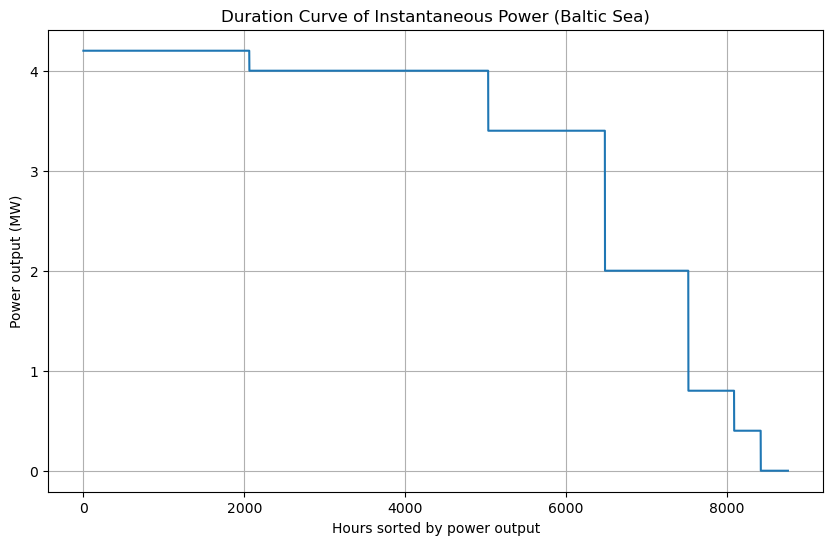

In [88]:
import matplotlib.pyplot as plt

power_sorted = df['baltic_sea_power'].sort_values(ascending=False).reset_index(drop=True)

plt.figure(figsize=(10,6))
plt.plot(power_sorted)
plt.title('Duration Curve of Instantaneous Power (Baltic Sea)')
plt.xlabel('Hours sorted by power output')
plt.ylabel('Power output (MW)')
plt.grid(True)
plt.show()

In [90]:
# Turbine rated capacity in MW
rated_capacity = 4.2

# Normalize power outputs by rated capacity for both locations
df['north_sea_power_normalized'] = df['north_sea_power'] / rated_capacity
df['baltic_sea_power_normalized'] = df['baltic_sea_power'] / rated_capacity

In [94]:
rated_capacity = 4.2  # MW
hours_in_year = 365 * 24  # 8760 hours in a non-leap year



# Capacity factor calculation
capacity_factor_north = total_north_sea / (rated_capacity * hours_in_year)
capacity_factor_baltic = total_baltic_sea / (rated_capacity * hours_in_year)

print(f"North Sea Capacity Factor: {capacity_factor_north:.3f} ({capacity_factor_north*100:.1f}%)")
print(f"Baltic Sea Capacity Factor: {capacity_factor_baltic:.3f} ({capacity_factor_baltic*100:.1f}%)")

North Sea Capacity Factor: 0.546 (54.6%)
Baltic Sea Capacity Factor: 0.765 (76.5%)


In [131]:
rated_capacity = 4.2  # MW
hours_in_month = df.groupby(df.index.to_period('M')).size()

# Group energy by month for both locations
monthly_energy_north = df['north_sea_energy_MWh'].resample('ME').sum()


In [133]:
monthly_energy_baltic = df['baltic_sea_energy_MWh'].resample('ME').sum()

In [151]:
monthly_energy_north.index = monthly_energy_north.index.to_period('M')
monthly_energy_baltic.index = monthly_energy_baltic.index.to_period('M')

# Now division will align properly
monthly_capacity_factor_north = monthly_energy_north / (rated_capacity * hours_in_month)
monthly_capacity_factor_baltic = monthly_energy_baltic / (rated_capacity * hours_in_month)

# Combine results
monthly_capacity_factors = pd.DataFrame({
    'North Sea': monthly_capacity_factor_north,
    'Baltic Sea': monthly_capacity_factor_baltic
})

print(monthly_capacity_factors)

         North Sea  Baltic Sea
time                          
2019-01   0.659498    0.748272
2019-02   0.567248    0.797477
2019-03   0.655594    0.774642
2019-04   0.471892    0.771561
2019-05   0.513185    0.813684
2019-06   0.377315    0.672751
2019-07   0.490527    0.760497
2019-08   0.394521    0.689900
2019-09   0.577183    0.788426
2019-10   0.587366    0.768881
2019-11   0.571098    0.776323
2019-12   0.685228    0.817076


In [156]:
zero_power_north = (df['north_sea_power'] == 0).sum() / len(df)

# Calculate the share of zero power hours for Baltic Sea
zero_power_baltic = (df['baltic_sea_power'] == 0).sum() / len(df)

print(f"North Sea turbine produces no power {zero_power_north:.2%} of the time.")
print(f"Baltic Sea turbine produces no power {zero_power_baltic:.2%} of the time.")

North Sea turbine produces no power 2.36% of the time.
Baltic Sea turbine produces no power 3.87% of the time.


In [158]:
ated_capacity = 4.2  # MW

# Calculate the share of hours at rated capacity for North Sea
rated_power_north = (df['north_sea_power'] == rated_capacity).sum() / len(df)

# Calculate the share of hours at rated capacity for Baltic Sea
rated_power_baltic = (df['baltic_sea_power'] == rated_capacity).sum() / len(df)

print(f"North Sea turbine produces rated power {rated_power_north:.2%} of the time.")
print(f"Baltic Sea turbine produces rated power {rated_power_baltic:.2%} of the time.")

North Sea turbine produces rated power 4.27% of the time.
Baltic Sea turbine produces rated power 23.55% of the time.


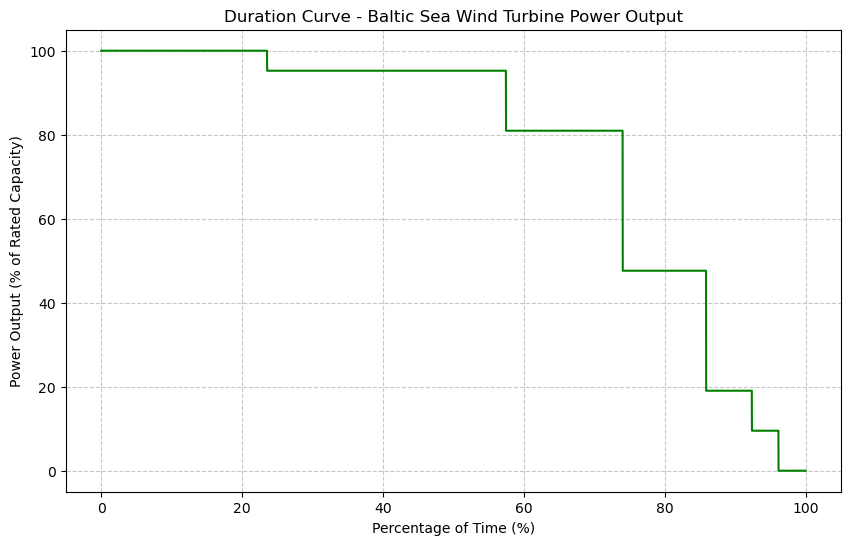

In [162]:


rated_capacity = 4.2

# Normalize power output to % of rated capacity
power_pct = (df['baltic_sea_power'] / rated_capacity) * 100

# Sort descending (duration curve)
power_sorted = power_pct.sort_values(ascending=False).reset_index(drop=True)

# Calculate % of time (x-axis)
percent_time = np.linspace(0, 100, len(power_sorted))

plt.figure(figsize=(10,6))
plt.plot(percent_time, power_sorted, color='green')

plt.xlabel('Percentage of Time (%)')
plt.ylabel('Power Output (% of Rated Capacity)')
plt.title('Duration Curve - Baltic Sea Wind Turbine Power Output')

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


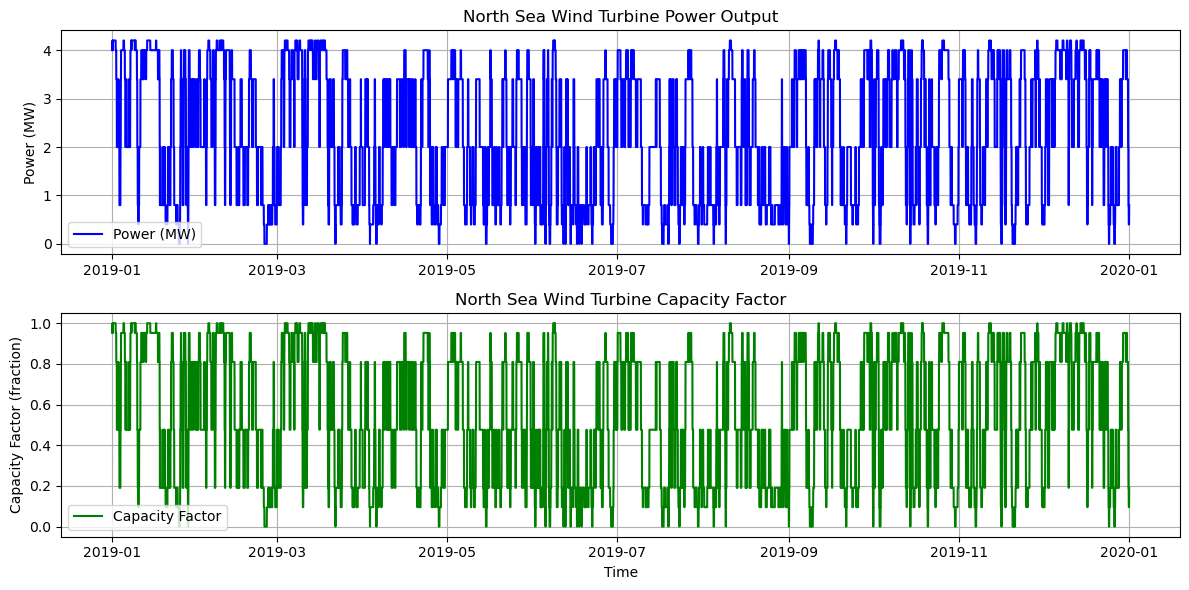

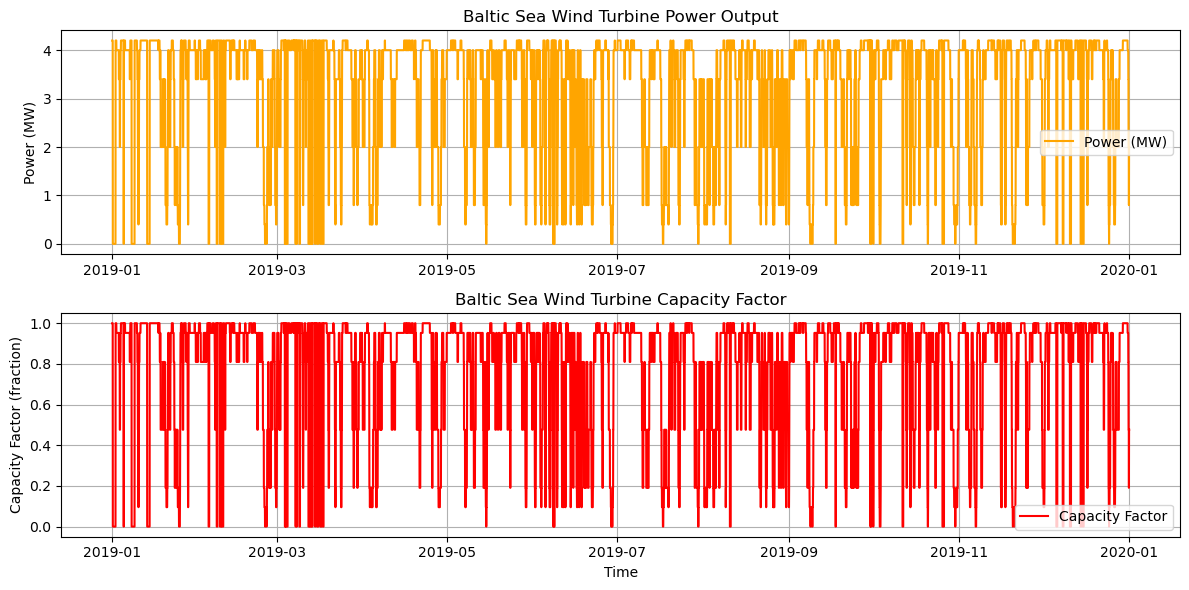

In [166]:


import matplotlib.pyplot as plt

rated_capacity = 4.2  # MW

# Calculate capacity factor time series
df['north_sea_capacity_factor'] = df['north_sea_power'] / rated_capacity
df['baltic_sea_capacity_factor'] = df['baltic_sea_power'] / rated_capacity

# Plot for North Sea
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['north_sea_power'], label='Power (MW)', color='blue')
plt.title('North Sea Wind Turbine Power Output')
plt.ylabel('Power (MW)')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df.index, df['north_sea_capacity_factor'], label='Capacity Factor', color='green')
plt.title('North Sea Wind Turbine Capacity Factor')
plt.ylabel('Capacity Factor (fraction)')
plt.xlabel('Time')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Plot for Baltic Sea
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['baltic_sea_power'], label='Power (MW)', color='orange')
plt.title('Baltic Sea Wind Turbine Power Output')
plt.ylabel('Power (MW)')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df.index, df['baltic_sea_capacity_factor'], label='Capacity Factor', color='red')
plt.title('Baltic Sea Wind Turbine Capacity Factor')
plt.ylabel('Capacity Factor (fraction)')
plt.xlabel('Time')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


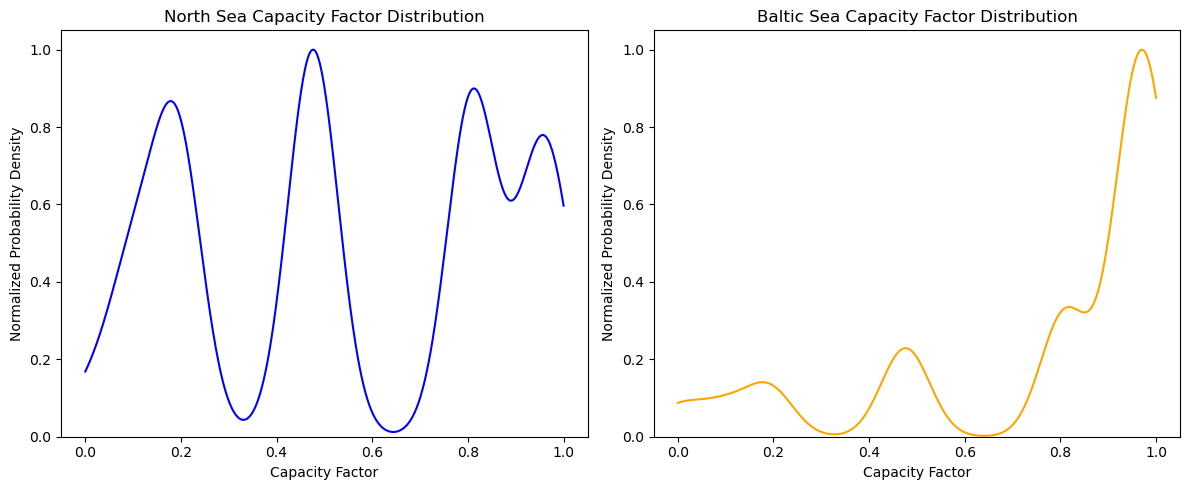

In [172]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def plot_normalized_kde(data, title, color):
    kde = gaussian_kde(data)
    x_vals = np.linspace(0, 1, 500)  # Capacity factor ranges from 0 to 1
    y_vals = kde(x_vals)
    y_vals_normalized = y_vals / y_vals.max()  # Normalize max to 1

    plt.plot(x_vals, y_vals_normalized, color=color)
    plt.title(title)
    plt.xlabel('Capacity Factor')
    plt.ylabel('Normalized Probability Density')
    plt.ylim(0, 1.05)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plot_normalized_kde(df['north_sea_capacity_factor'], 'North Sea Capacity Factor Distribution', 'blue')

plt.subplot(1,2,2)
plot_normalized_kde(df['baltic_sea_capacity_factor'], 'Baltic Sea Capacity Factor Distribution', 'orange')

plt.tight_layout()
plt.show()
